In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

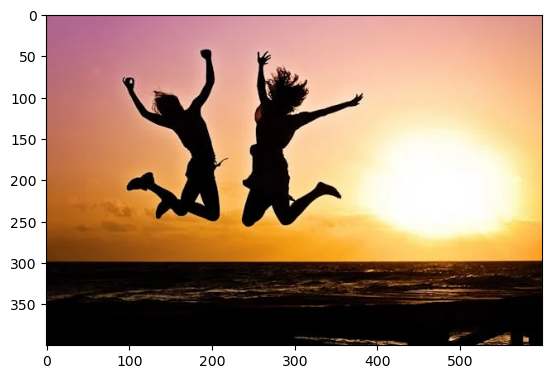

In [3]:
img = image.load_img(r"C:\Users\prasa\OneDrive\Desktop\CNN\training\happy\youth-active-jump-happy-40815.webp")
plt.imshow(img)

In [4]:
i1 = cv2.imread(r"C:\Users\prasa\OneDrive\Desktop\CNN\training\happy\youth-active-jump-happy-40815.webp")
i1

array([[[144,  98, 174],
        [144,  98, 174],
        [144,  98, 174],
        ...,
        [137, 144, 218],
        [135, 144, 218],
        [135, 144, 218]],

       [[144,  98, 174],
        [144,  98, 174],
        [144,  98, 174],
        ...,
        [137, 144, 218],
        [135, 144, 218],
        [135, 144, 218]],

       [[144,  98, 174],
        [144,  98, 174],
        [144,  98, 174],
        ...,
        [137, 144, 218],
        [135, 144, 218],
        [135, 144, 218]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [5]:
i1.shape

(400, 600, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory(r'C:\Users\prasa\OneDrive\Desktop\CNN\training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\prasa\OneDrive\Desktop\CNN\validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 12 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# now we are applying maxpooling 

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

c:\Users\prasa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [12]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=50,
                    validation_data=validation_dataset)


c:\Users\prasa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.5694 - loss: 4.6499 - val_accuracy: 0.5000 - val_loss: 1.1815
Epoch 2/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6667 - loss: 0.8742

c:\Users\prasa\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6667 - loss: 0.8742 - val_accuracy: 0.5000 - val_loss: 0.7758
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.5139 - loss: 0.7880 - val_accuracy: 0.5000 - val_loss: 0.6757
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6667 - loss: 0.6918 - val_accuracy: 0.6667 - val_loss: 0.6620
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.8194 - loss: 0.6538 - val_accuracy: 0.5000 - val_loss: 0.5871
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.0000e+00 - loss: 0.8006 - val_accuracy: 0.8333 - val_loss: 0.6175
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.7083 - loss: 0.6055 - val_accuracy: 1.0000 - val_loss: 0.5565
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.5688 - val_accuracy: 0.6667 - val_loss: 0.5171
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.6250 - loss: 0.5277 - val_accuracy: 0.6667 - val_loss: 0.5500
Epoch 10/50
3/3 ━━━

In [13]:
dir_path = r'C:\Users\prasa\OneDrive\Desktop\CNN\testing'
for i in os.listdir(dir_path):
    print(i)

adrian-swancar-JXXdS4gbCTI-unsplash.jpg
anthony-tran-4rWjKzxilGI-unsplash.jpg
engin-akyurt-tblxZC4gCJg-unsplash.jpg
fabian-centeno-Snce5c3YjgI-unsplash.jpg
gabriel-E-b_VNmtGJY-unsplash.jpg
kristina-tripkovic-nwWUBsW6ud4-unsplash.jpg
pexels-a-darmel-7710118.jpg
pexels-chetanvlad-2923157.jpg
pexels-hamann-la-338986-1205033.jpg
pexels-hazardos-1535244.jpg
pexels-photo-573238.webp
pexels-wildlittlethingsphoto-708440.jpg
youth-active-jump-happy-40815.webp
yuris-alhumaydy-mSXMHkgRs8s-unsplash.jpg


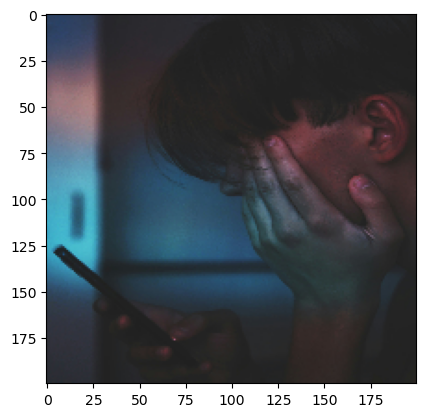

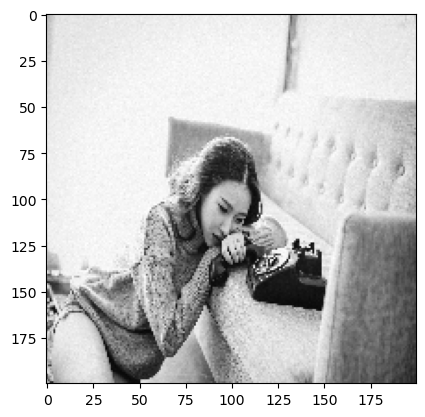

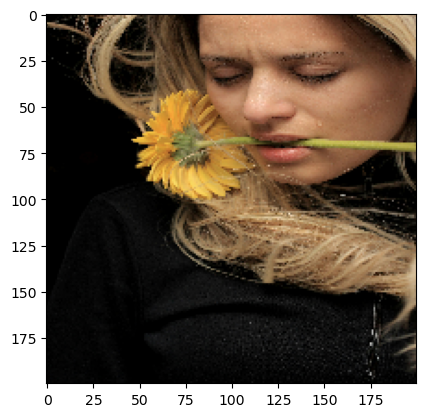

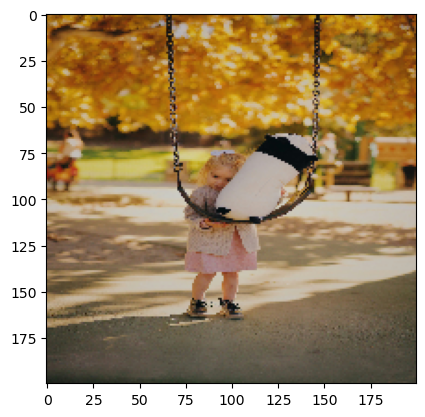

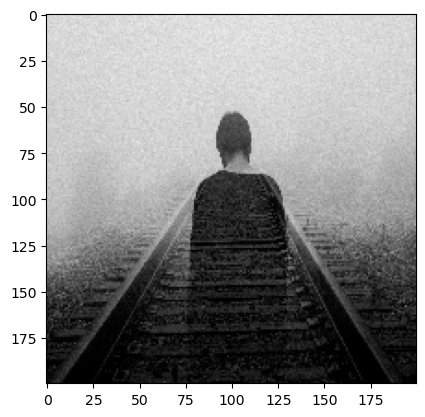

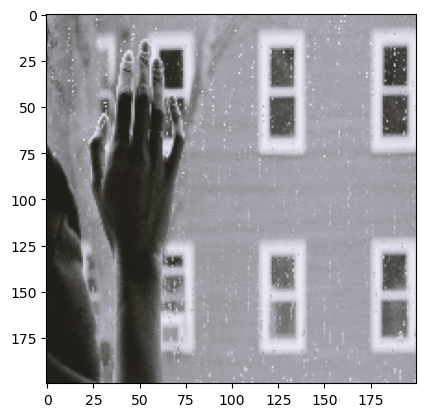

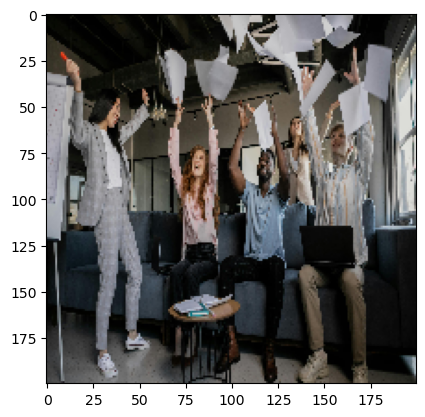

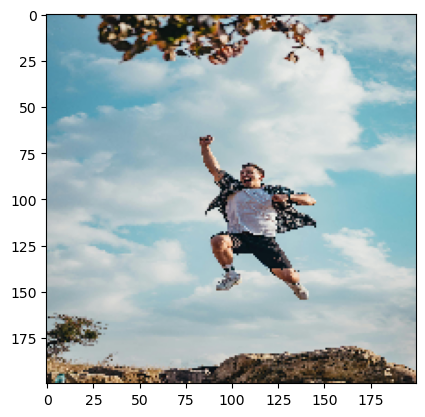

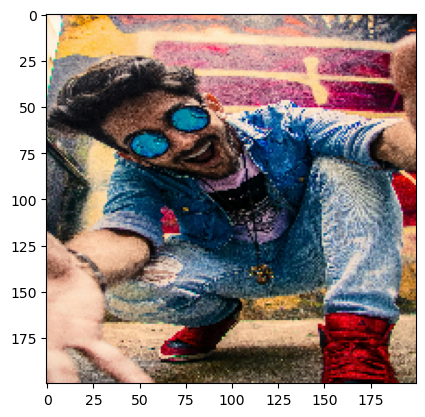

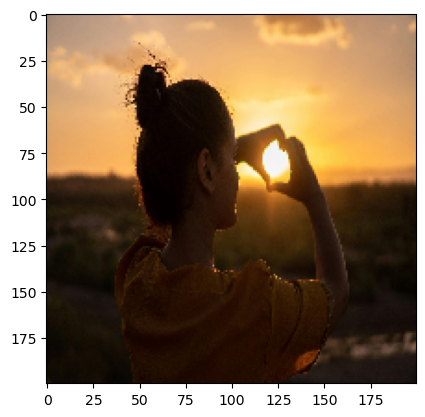

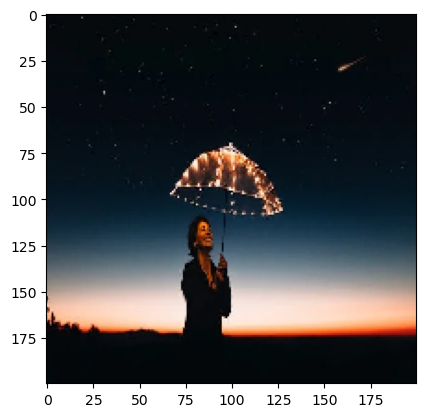

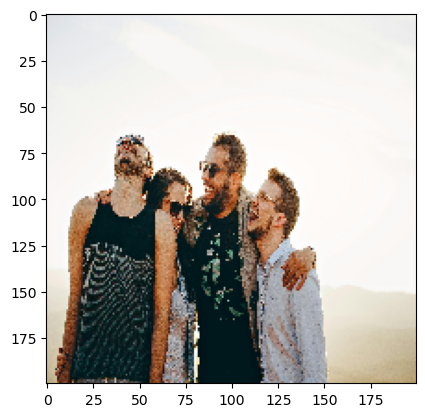

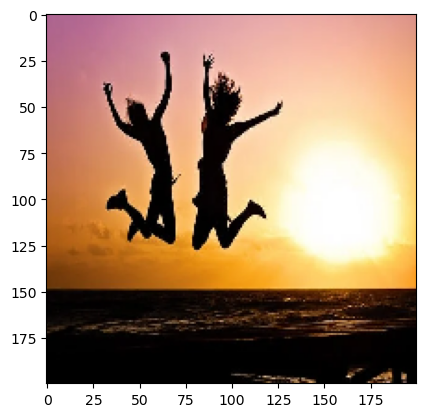

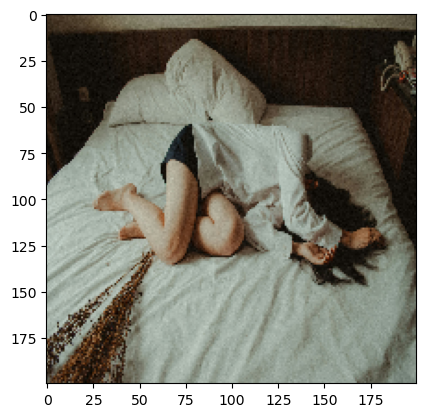

In [15]:
dir_path = r'C:\Users\prasa\OneDrive\Desktop\CNN\testing'
for i in os.listdir(dir_path):
    img_path=os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()


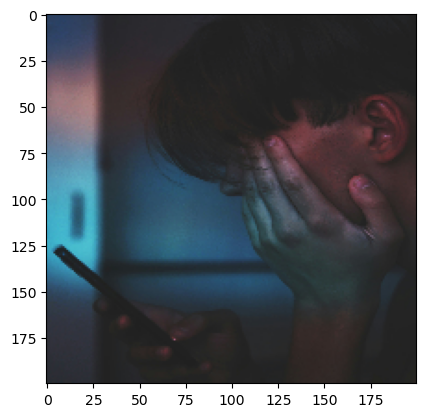

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
I am not Happy


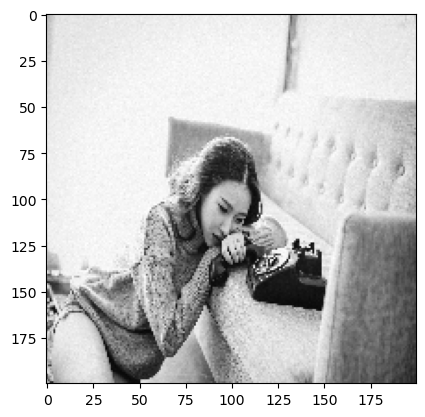

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
I am not Happy


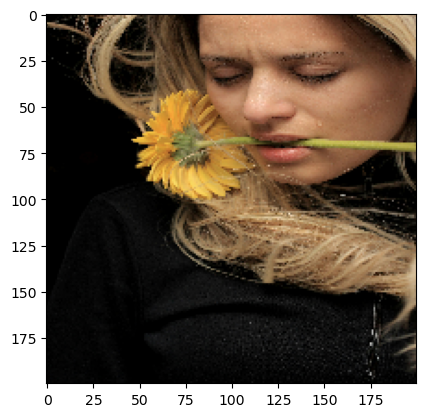

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I am not Happy


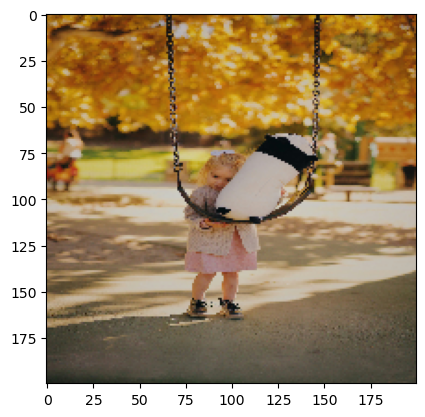

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I am not Happy


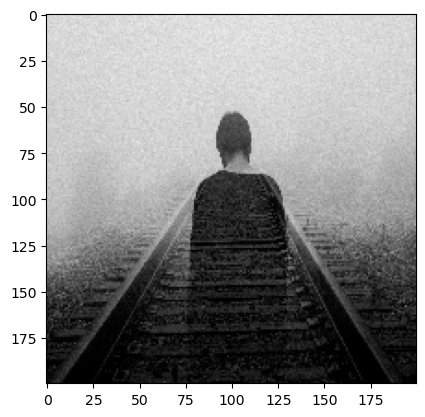

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I am not Happy


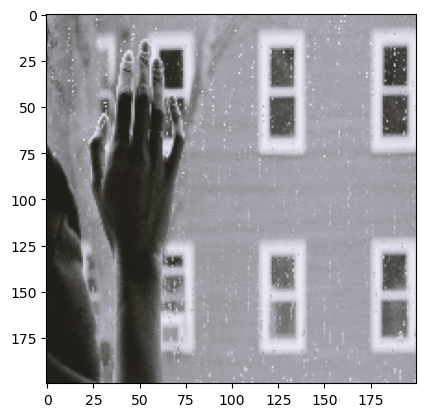

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I am not Happy


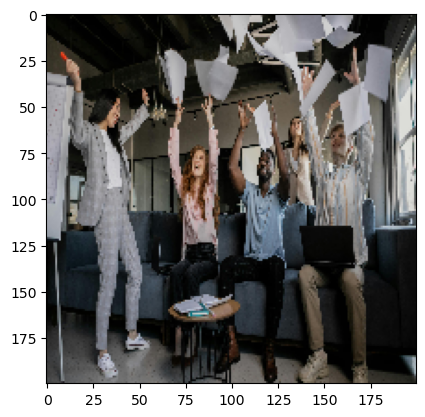

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I am happy


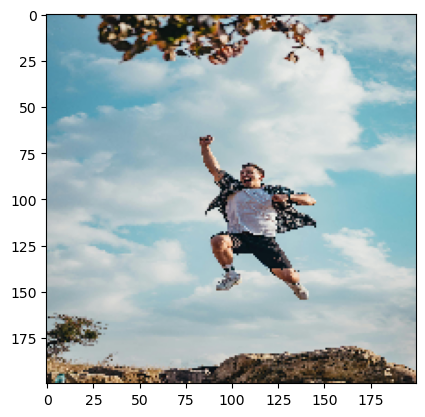

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I am happy


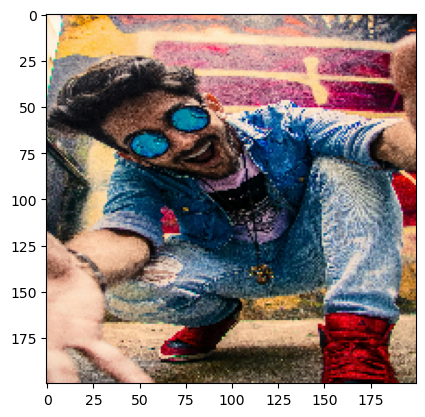

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I am happy


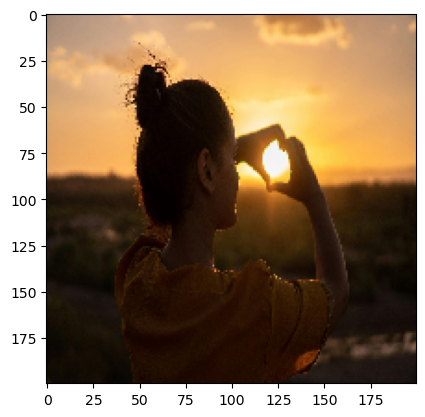

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I am happy


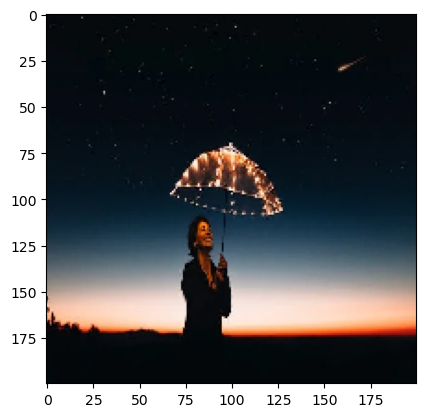

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
I am happy


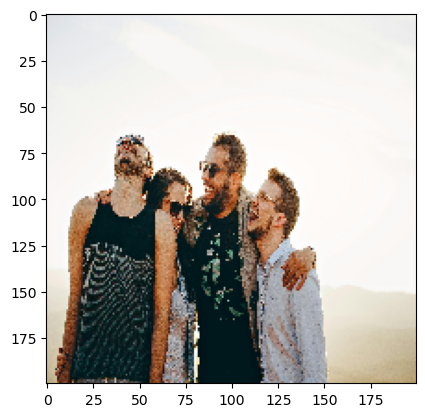

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I am happy


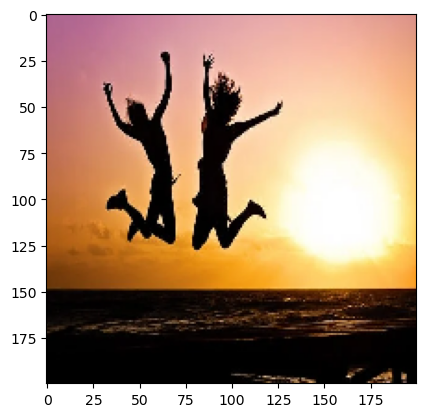

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
I am happy


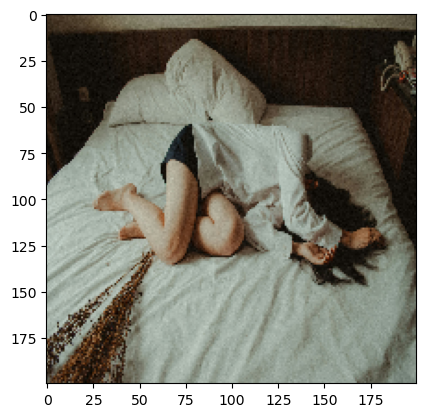

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
I am not Happy


In [20]:
dir_path = r'C:\Users\prasa\OneDrive\Desktop\CNN\testing'
for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    val = model.predict(images)
    if val < 0.5 :
        print('I am happy')
    else:
        print('I am not Happy')